In [55]:
# import modules needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [56]:
# generate sample data
np.random.seed(42)
time = np.arange(0, 365 * 4)
trend = 0.05 * time
seasonality = 10 * np.sin(2 * np.pi * time / 365)
noise = np.random.normal(0, 3, len(time))

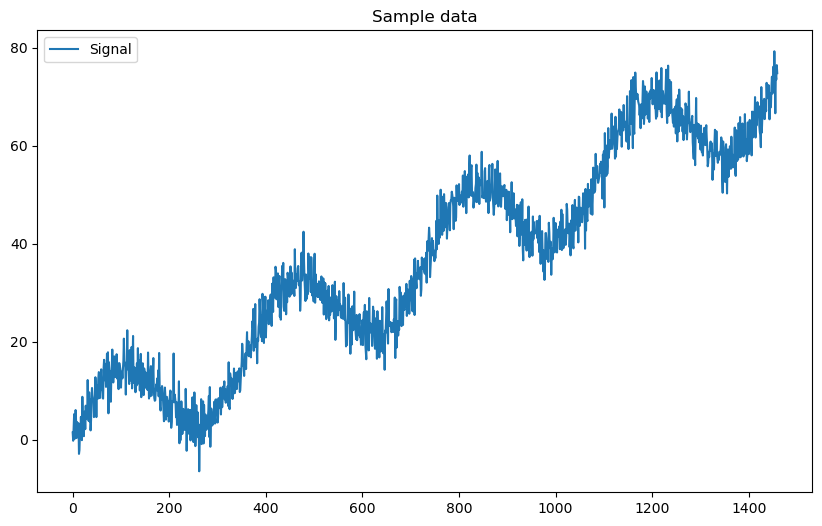

In [57]:
# plot sample data
plt.figure(figsize=(10, 6))
plt.plot(time, trend + seasonality + noise, label='Signal')
plt.legend()
plt.title('Sample data')
plt.show()

In [58]:
# plot sample data
# plt.figure(figsize=(10, 6))
# plt.plot(time, trend * seasonality * noise, label='Signal')
# plt.legend()
# plt.title('Sample data')
# plt.show()

<Axes: >

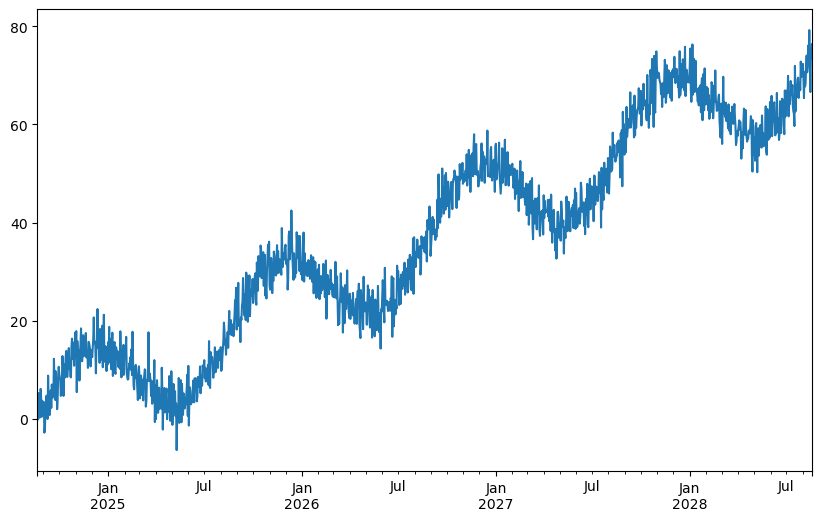

In [59]:
# convert data to pandas DataFrame
data_index = pd.date_range(start='2024-08-21', periods=len(time), freq='D')
# add trend, seasonality, and noise to the DataFrame
timeseries = pd.Series(trend + seasonality + noise, index=data_index)
trend = pd.Series(trend, index=data_index)
seasonality = pd.Series(seasonality, index=data_index)
noise = pd.Series(noise, index=data_index)
timeseries.plot(figsize=(10, 6), label='Signal')

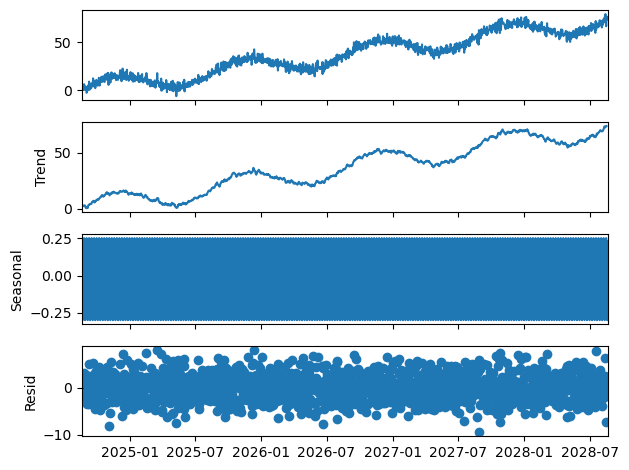

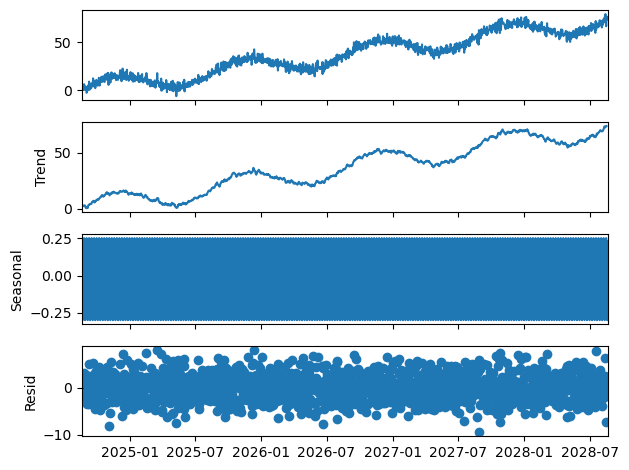

In [60]:
# decompose timeseries data
decomposed_data = seasonal_decompose(timeseries, model='additive')
decomposed_data.plot()

In [61]:
# check stationarity
def is_stationarity(series):
    mean = np.mean(series)
    var = np.var(series)
    return mean, var

In [62]:
mean, var = is_stationarity(timeseries)
print(f'Mean: {mean}, Variance: {var}')

Mean: 36.610446960734386, Variance: 450.03966157438964


In [63]:
# conclusion: the data is not stationary

In [64]:
# smooth the data
smoothed_data = timeseries.rolling(window=30).mean()

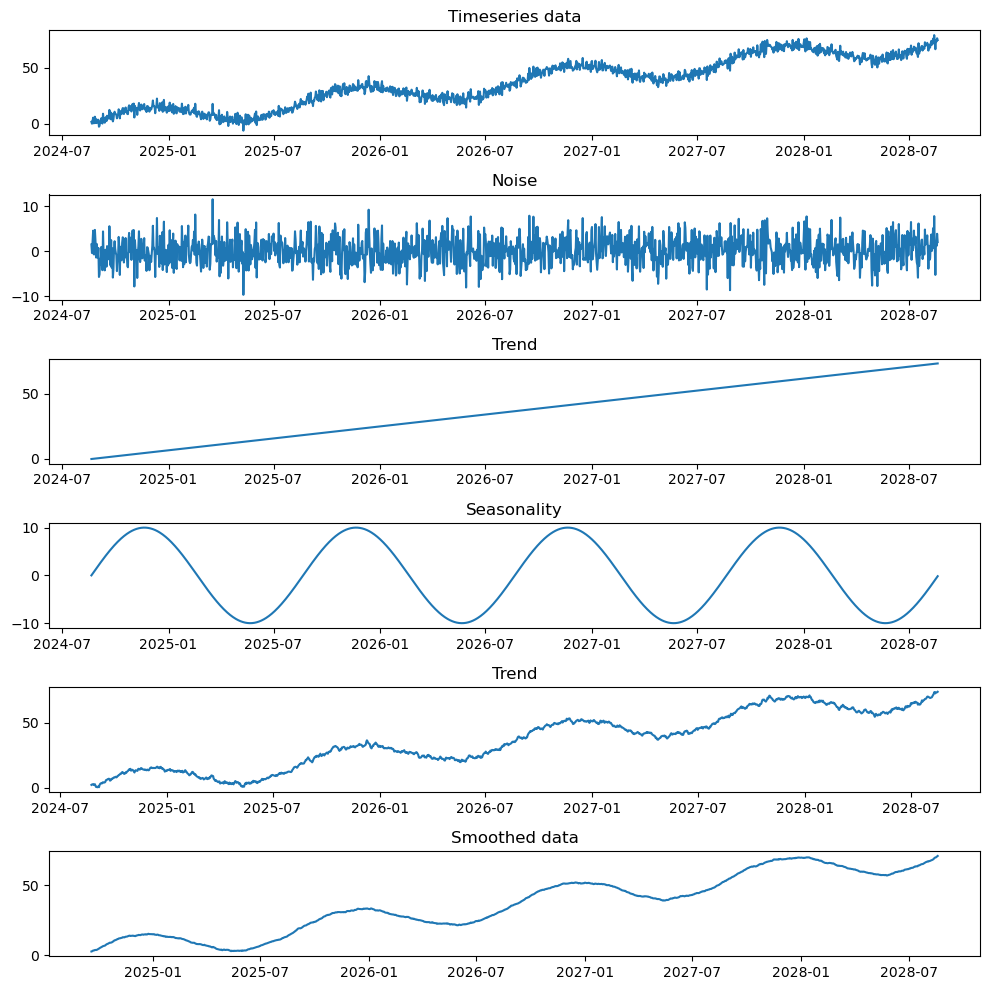

In [65]:
# plot all data
fig, axis = plt.subplots(6, 1, figsize=(10, 10))
# plot timeseries
axis[0].plot(timeseries)
axis[0].set_title('Timeseries data')
# plot noise
axis[1].plot(noise)
axis[1].set_title('Noise')
# plot trend
axis[2].plot(trend)
axis[2].set_title('Trend')
# plot seasonality
axis[3].plot(seasonality)
axis[3].set_title('Seasonality')
# plot decomposed data
axis[4].plot(decomposed_data.trend)
axis[4].set_title('Trend')
# plot smoothed data
axis[5].plot(smoothed_data)
axis[5].set_title('Smoothed data')
plt.tight_layout()
plt.show()

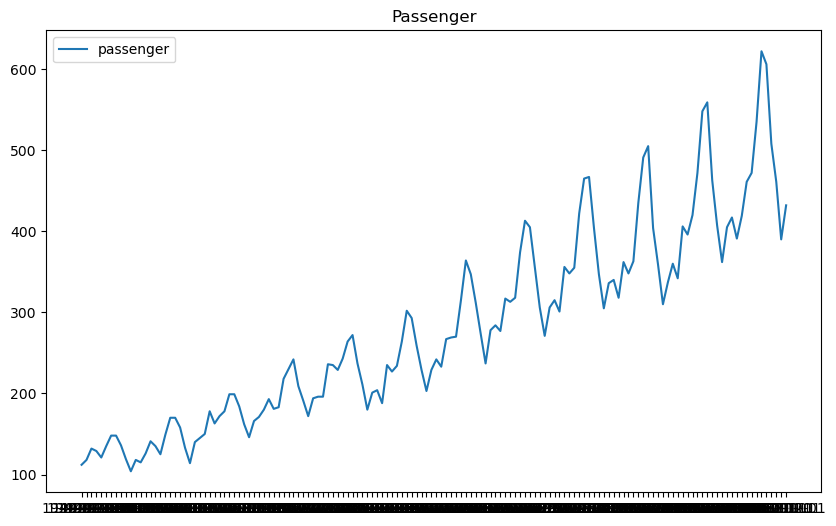

In [66]:
# Case study passenger data
df = pd.read_csv('./passengers.csv')
df.head()

# plot passenger data
plt.figure(figsize=(10, 6))
plt.plot(df["date"], df["value"], label='passenger')
plt.legend()
plt.title('Passenger')
plt.show()

In [67]:
# clean data set
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month   
df['year'] = df['date'].dt.year
display(df.head())

,date,value,month,year
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949


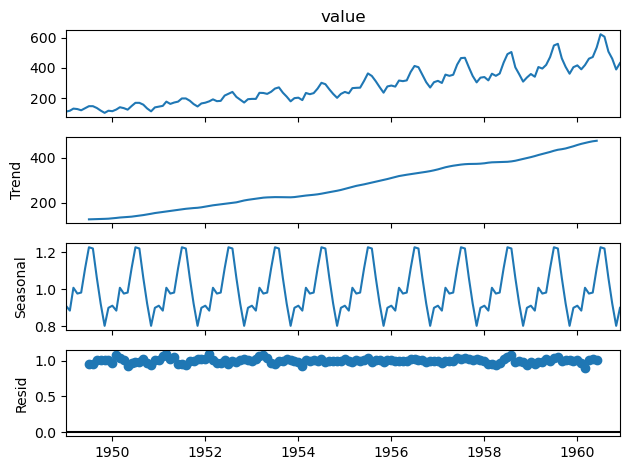

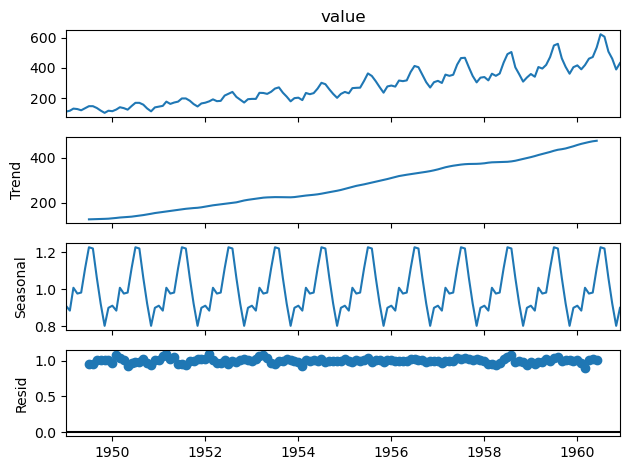

In [68]:
# decompose data
passenger_data = df.set_index('date')['value']  
decomposed_passenger_data = seasonal_decompose(passenger_data, model='multiplicative')
decomposed_passenger_data.plot()

In [69]:
# forcasting data
df.set_index('date', inplace=True)
# split train and test data
train = df[:'1959-12-01']
test = df['1960-01-01':]


In [70]:
# forcast naive model
def naive_model(train, test):
    return pd.Series(train['value'].iloc[-1], index=test.index)
naive_df = naive_model(train, test)
display(naive_df.head())

date
1960-01-01    405
1960-02-01    405
1960-03-01    405
1960-04-01    405
1960-05-01    405
dtype: int64

In [71]:
# simple average model
def simple_average_model(train, test):
    return pd.Series(train['value'].mean(), index=test.index)
simple_average_df = simple_average_model(train, test)
display(simple_average_df.head())

date
1960-01-01    262.492424
1960-02-01    262.492424
1960-03-01    262.492424
1960-04-01    262.492424
1960-05-01    262.492424
dtype: float64

In [72]:
# moving average model
def moving_average_model(train, test, window):
    return pd.Series(train['value'].rolling(window=window).mean().iloc[-1], index=test.index)
moving_average_df = moving_average_model(train, test, 12)
display(moving_average_df.head())

date
1960-01-01    428.333333
1960-02-01    428.333333
1960-03-01    428.333333
1960-04-01    428.333333
1960-05-01    428.333333
dtype: float64

In [73]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# simple exponential model
def simple_exponential_model(train, test, alpha):
    model = SimpleExpSmoothing(train['value'])
    return model.fit(smoothing_level=alpha).forecast(len(test))
ewm_df = simple_exponential_model(train, test, 0.5)
display(ewm_df.head())

/Users/hubble/anaconda3/envs/py_data/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/hubble/anaconda3/envs/py_data/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


1960-01-01    405.681091
1960-02-01    405.681091
1960-03-01    405.681091
1960-04-01    405.681091
1960-05-01    405.681091
Freq: MS, dtype: float64

In [74]:
from statsmodels.tsa.holtwinters import Holt
# holts linear model
def holts_linear_model(train, test, alpha, beta):
    model = Holt(train['value']).fit(smoothing_level=alpha, smoothing_trend=beta)
    return model.forecast(len(test))
hlm_df = holts_linear_model(train, test, 0.6, 0.05)
display(hlm_df.head())

/Users/hubble/anaconda3/envs/py_data/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/hubble/anaconda3/envs/py_data/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


1960-01-01    402.565782
1960-02-01    403.248290
1960-03-01    403.930797
1960-04-01    404.613305
1960-05-01    405.295812
Freq: MS, dtype: float64

In [75]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# holts winter model
def holts_winter_model(train, test, alpha, beta, gamma, period):
    model = ExponentialSmoothing(
            train['value'], 
            trend='add', 
            seasonal='add', 
            seasonal_periods=period).fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
    return model.forecast(len(test))
hwm_df = holts_winter_model(train, test, 0.5, 0.5, 0.5, 12)
display(hwm_df.head())  

/Users/hubble/anaconda3/envs/py_data/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1960-01-01    435.990509
1960-02-01    419.390546
1960-03-01    475.261879
1960-04-01    458.716109
1960-05-01    474.478299
Freq: MS, dtype: float64

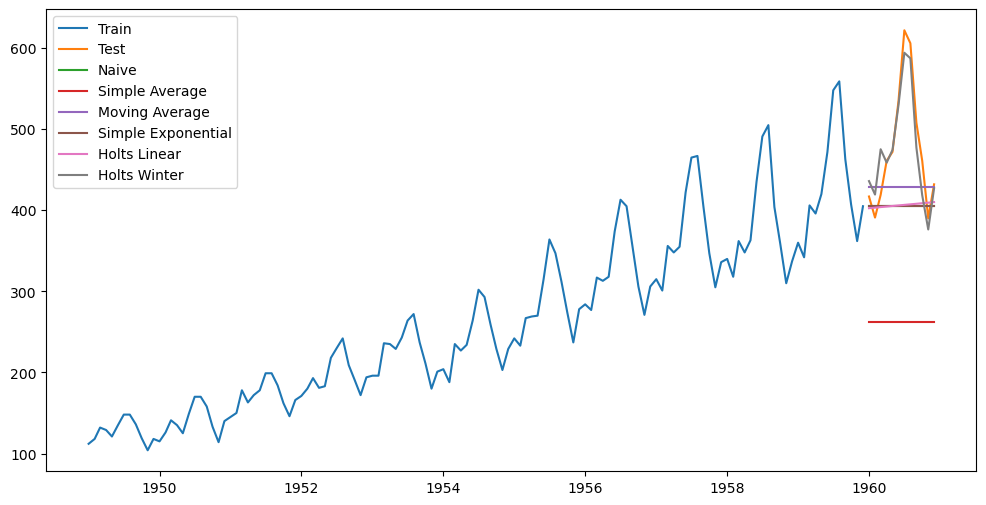

In [76]:
# plot all models
fig, axis = plt.subplots(figsize=(12,6))
axis.plot(train['value'], label='Train')
axis.plot(test['value'], label='Test')
axis.plot(naive_df, label='Naive')
axis.plot(simple_average_df, label='Simple Average')
axis.plot(moving_average_df, label='Moving Average')
axis.plot(ewm_df, label='Simple Exponential')
axis.plot(hlm_df, label='Holts Linear')
axis.plot(hwm_df, label='Holts Winter')
plt.legend()
plt.show()